In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.svm import OneClassSVM


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/AnomaData.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel(file_path)
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [ ]:
data.shape

(18398, 62)

In [ ]:
data.describe()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,1999-05-15 01:20:42.728557312,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
min,1999-05-01 00:00:00,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,1999-05-08 03:36:30,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,1999-05-14 18:39:00,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,1999-05-22 06:01:30,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1999-05-29 00:06:00,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000
std,NaN,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120


**Exploratory Data analysis**

Checking missing values

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicated columns
duplicated_columns = data.columns[data.columns.duplicated()].tolist()

# Convert 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])

In [ ]:
# Display results
missing_values, duplicated_columns, data.dtypes.head()

(time    0
 y       0
 x1      0
 x2      0
 x3      0
        ..
 x57     0
 x58     0
 x59     0
 x60     0
 y.1     0
 Length: 62, dtype: int64,
 [],
 time    datetime64[ns]
 y                int64
 x1             float64
 x2             float64
 x3             float64
 dtype: object)

In [ ]:
# Drop the duplicated column 'y.1'
data_cleaned = data.drop(columns=['y.1'])

# Verify the column removal
data_cleaned.head()


,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105


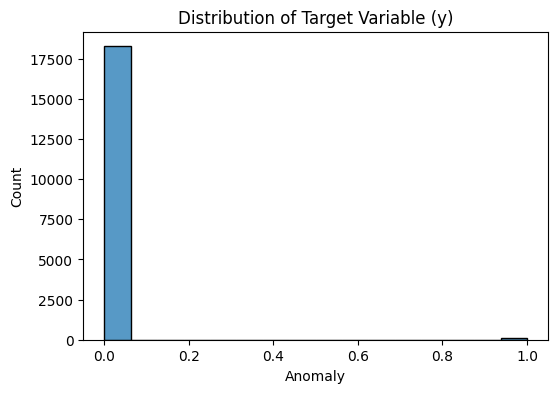

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['y'])
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()



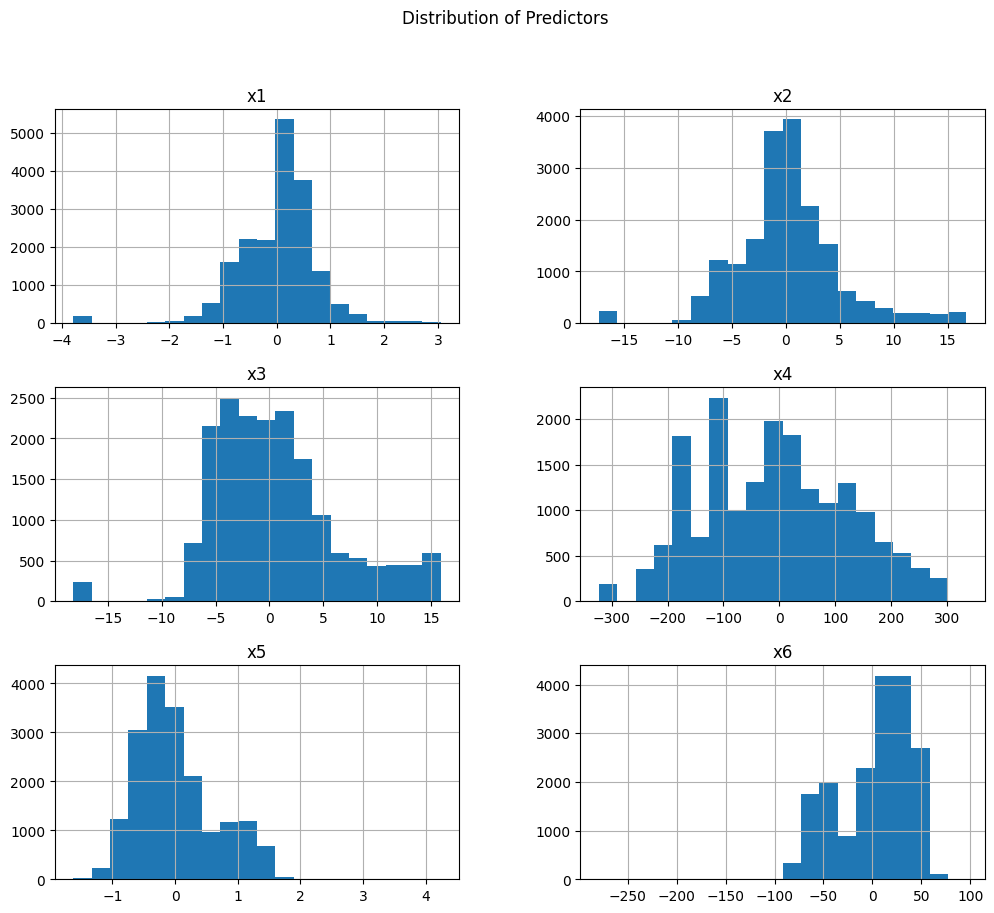

In [ ]:
# Plot histograms for the first few predictors to understand their distribution
data_cleaned.iloc[:, 2:8].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Predictors')
plt.show()

In [ ]:
data_cleaned.columns

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60'],
      dtype='object')

**Splitting the original data set using stratified shuffle split**

In [ ]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

X = data_cleaned.drop('y', axis = 1)

y = data_cleaned['y']

sss = StratifiedKFold(n_splits= 5, random_state = None, shuffle = False )

for train_index, test_index in sss.split (X,y):
  print('Train: ', train_index, 'Test : ', test_index)
  original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
  original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# checking the train and test label distribution

train_unique_label , train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)

print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Train:  [ 3675  3676  3677 ... 18395 18396 18397] Test :  [   0    1    2 ... 4079 4132 4277]
Train:  [    0     1     2 ... 18395 18396 18397] Test :  [3675 3676 3677 ... 7357 7446 7475]
Train:  [    0     1     2 ... 18395 18396 18397] Test :  [ 7358  7359  7360 ... 11044 11045 11046]
Train:  [    0     1     2 ... 18395 18396 18397] Test :  [10631 10684 10702 ... 14716 14717 15475]
Train:  [    0     1     2 ... 14716 14717 15475] Test :  [14718 14719 14720 ... 18395 18396 18397]
[0.993274 0.006726]
[0.99320468 0.00679532]


**Forming new dataframe with equal class distribution**

In [ ]:
data_cleaned = data_cleaned.sample(frac =1) # shuffling the rows of the original dataframe to remove the order

anamoly_data = data_cleaned.loc[data_cleaned['y'] == 1]   #
normal_data = data_cleaned.loc[data_cleaned['y'] == 0][:125]


normal_distributed_df = pd.concat([anamoly_data, normal_data]) # form a new data distribution

new_df = normal_distributed_df.sample(frac = 1, random_state = 42)

In [ ]:
new_df.columns

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60'],
      dtype='object')

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['y'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
y
0    0.502008
1    0.497992
Name: count, dtype: float64


<ipython-input-94-1e44c231663f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'y', data = new_df, palette = [green_color, red_color])


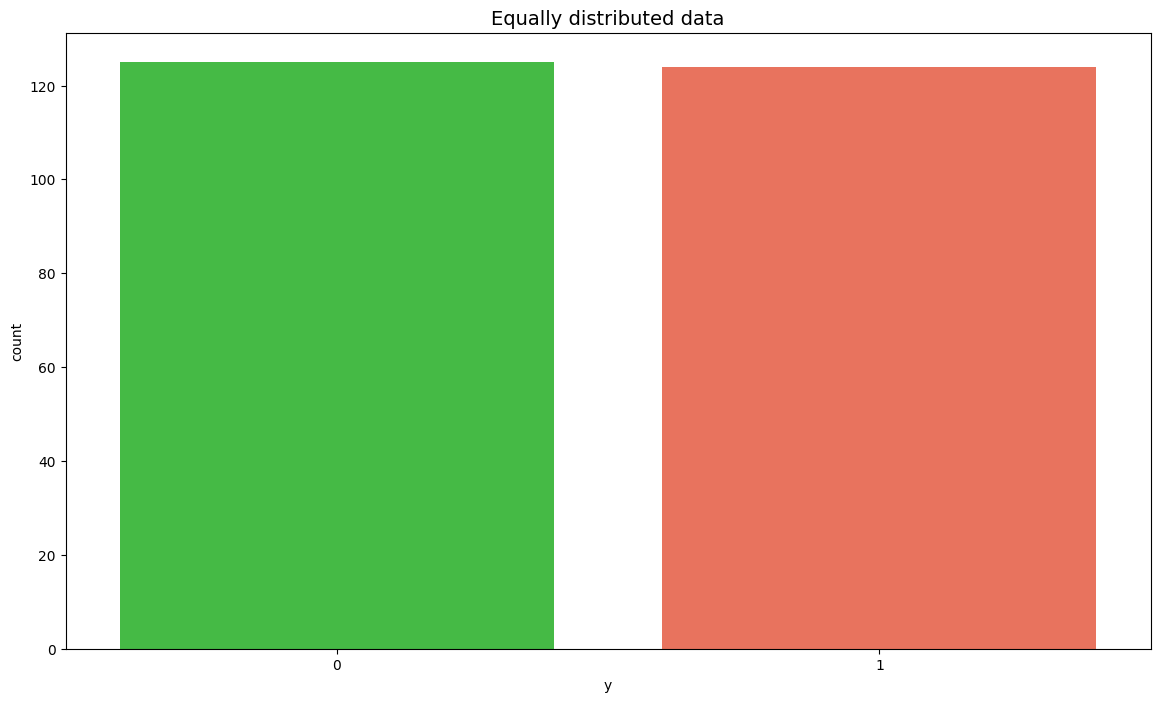

In [ ]:
green_color = '#32CD32'
red_color = "#FF6347"
colors = [green_color, red_color]
sns.countplot(x = 'y', data = new_df, palette = [green_color, red_color])
plt.title('Equally distributed data', fontsize = 14)
plt.show()

Text(0.5, 1.0, 'SubSample Correlation Matrix')

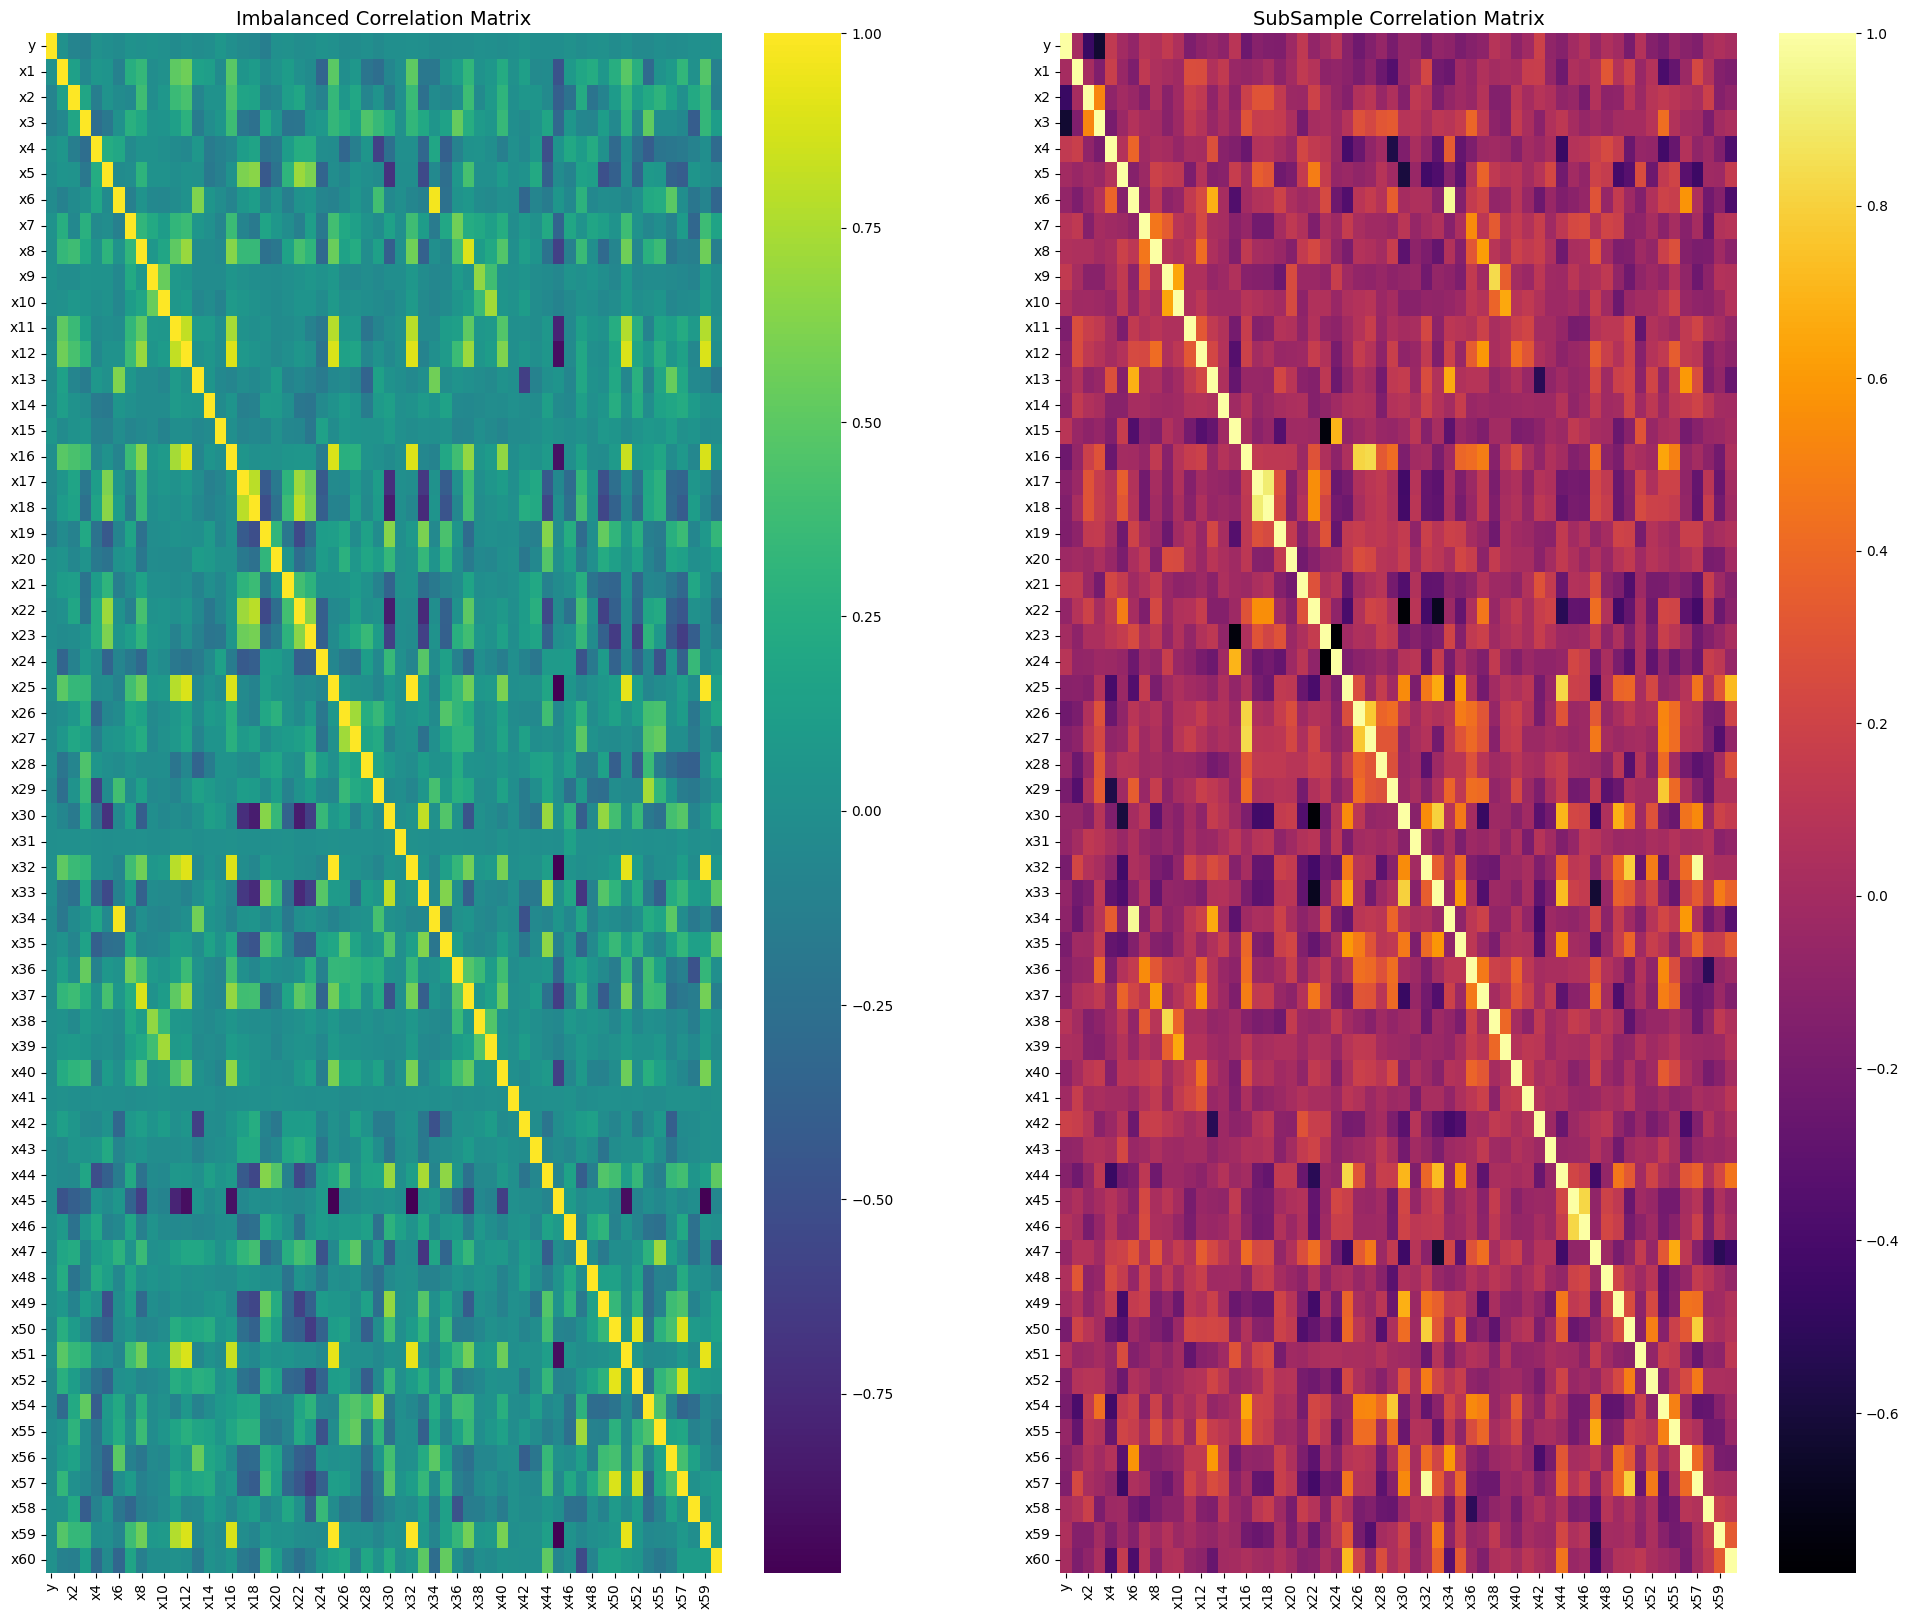

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (24,20))

# entire data frame
corr = data_cleaned.corr()
sns.heatmap(corr, cmap = 'viridis', annot_kws = {'size': 20}, ax = ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap = 'inferno', annot_kws = {'size': 20}, ax = ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize = 14)

In [ ]:
# Check for class imbalance
class_counts = data_cleaned['y'].value_counts()


# Display results
class_counts, corr['y'].sort_values(ascending=False).head(10)


(y
 0    18274
 1      124
 Name: count, dtype: int64,
 y      1.000000
 x15    0.058647
 x42    0.034149
 x9     0.024217
 x24    0.023117
 x7     0.018346
 x4     0.016792
 x60    0.016083
 x21    0.015817
 x46    0.012870
 Name: y, dtype: float64)

In [ ]:
# Check for class imbalance
newdf_class_counts = new_df['y'].value_counts()


# Display results
newdf_class_counts, sub_sample_corr['y'].sort_values(ascending=False).head(10)


(y
 0    125
 1    124
 Name: count, dtype: int64,
 y      1.000000
 x42    0.234159
 x9     0.158096
 x21    0.151595
 x60    0.142779
 x58    0.122384
 x38    0.120950
 x1     0.120409
 x24    0.115736
 x7     0.104853
 Name: y, dtype: float64)

In [ ]:
X = new_df.drop('y', axis=1)

y = new_df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
X_train.shape

(199, 59)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
train_score = cross_val_score(rf, X_train, y_train, cv = 5)
print(round(train_score.mean(), 2) * 100, "% accuracy score")

89.0 % accuracy score


**Finding the best estimator using GridSearchCV**

In [ ]:
# Random Forest Classifier
rf_params = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)
# Random Forest best estimator
rf_clf = grid_rf.best_estimator_

In [ ]:
random_forest_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
random_forest_score = round(random_forest_score.mean() * 100, 2)
print('Random Forest Classifier - CV Score:', random_forest_score )

Random Forest Classifier - CV Score: 88.44


In [ ]:
rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5)
print('ROC AUC Score Random Forest Classifier:',roc_auc_score(y_train, rf_pred))

ROC AUC Score Random Forest Classifier: 0.8923948220064726


In [ ]:
# Calculate evaluation metrics
accuracy_train = accuracy_score(y_train, rf_pred)
roc_auc_train = roc_auc_score(y_train, rf_pred)
recall_train = recall_score(y_train, rf_pred)
precision_train = precision_score(y_train, rf_pred)
f1_train = f1_score(y_train, rf_pred)
conf_matrix_train = confusion_matrix(y_train, rf_pred)

# Print evaluation metrics
print("Accuracy Score:", accuracy_train)
print("ROC AUC Score:", roc_auc_train)
print("Recall Score:", recall_train)
print("Precision Score:", precision_train)
print("F1 Score:", f1_train)
print("Confusion Matrix:")
print(conf_matrix_train)
print(classification_report(y_train, rf_pred))

Accuracy Score: 0.8944723618090452
ROC AUC Score: 0.8923948220064726
Recall Score: 0.8333333333333334
Precision Score: 0.9411764705882353
F1 Score: 0.8839779005524863
Confusion Matrix:
[[98  5]
 [16 80]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       103
           1       0.94      0.83      0.88        96

    accuracy                           0.89       199
   macro avg       0.90      0.89      0.89       199
weighted avg       0.90      0.89      0.89       199



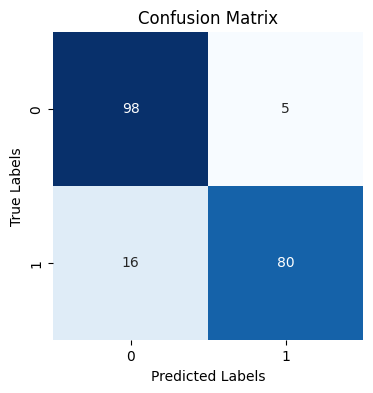

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_train, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy Score: 0.92
ROC AUC Score: 0.9237012987012987
Recall Score: 0.8928571428571429
Precision Score: 0.9615384615384616
F1 Score: 0.9259259259259259
Confusion Matrix:
[[21  1]
 [ 3 25]]


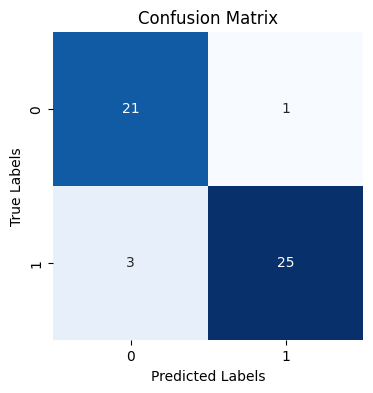

In [ ]:
rf_pred_test = rf_clf.predict(X_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, rf_pred_test)
roc_auc_test = roc_auc_score(y_test, rf_pred_test)
recall_test = recall_score(y_test, rf_pred_test)
precision_test = precision_score(y_test, rf_pred_test)
f1_test = f1_score(y_test, rf_pred_test)
conf_matrix_test = confusion_matrix(y_test, rf_pred_test)

print("Accuracy Score:", accuracy_test)
print("ROC AUC Score:", roc_auc_test)
print("Recall Score:", recall_test)
print("Precision Score:", precision_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(conf_matrix_test)


plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix_test, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Initial '1' labels count in y_train:  99
Initial '0' labels count in y_train:  14620
Shape of train_x after OverSampling:  (29240, 59)
Shape of train_y after OverSampling:  (29240,)
Percentage of '1' labels after OverSampling: 50.00%
Percentage of '0' labels after OverSampling: 50.00%


<ipython-input-114-ab9c44197388>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_s, palette='Set2')


<Axes: ylabel='count'>

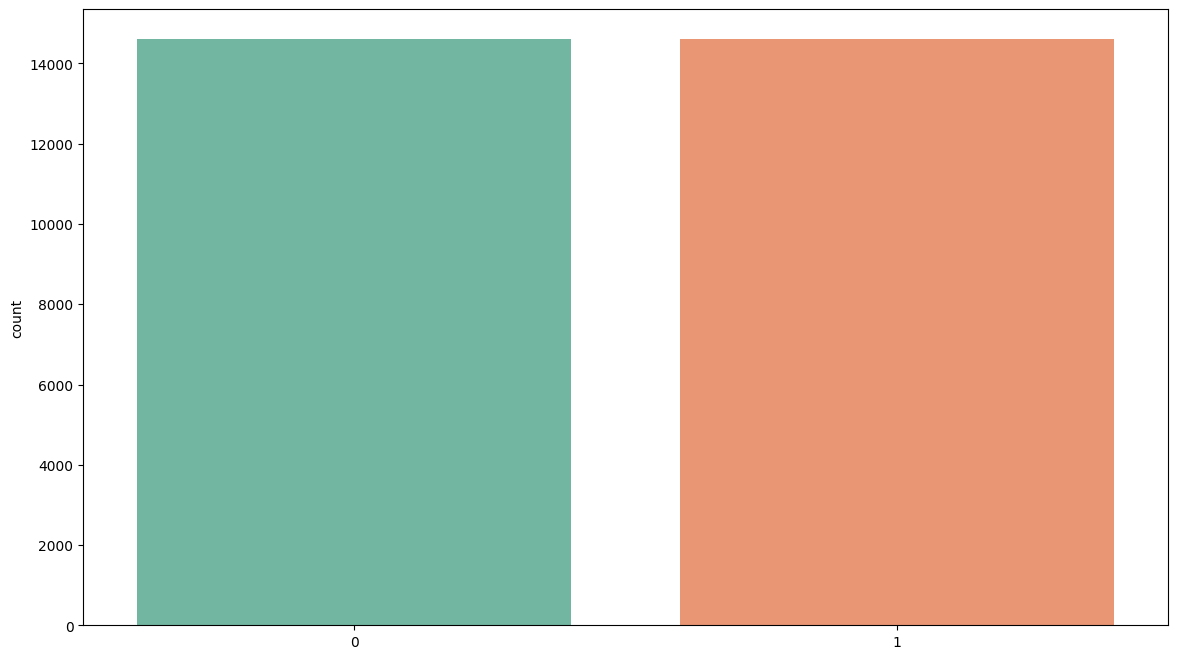

In [ ]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Before OverSampling
print("Initial '1' labels count in y_train: ", sum(original_ytrain==1))
print("Initial '0' labels count in y_train: ", sum(original_ytrain==0))

# Applying SMOTE
sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(original_Xtrain, original_ytrain.ravel())

# After OverSampling
print("Shape of train_x after OverSampling: ", x_train_s.shape)
print("Shape of train_y after OverSampling: ", y_train_s.shape)

print("Percentage of '1' labels after OverSampling: {:.2f}%".format(sum(y_train_s==1)/len(y_train_s)*100))
print("Percentage of '0' labels after OverSampling: {:.2f}%".format(sum(y_train_s==0)/len(y_train_s)*100))

# Visualizing the distribution with a different palette
sns.countplot(x=y_train_s, palette='Set2')

Text(0.5, 58.7222222222222, 'Predicted Label')

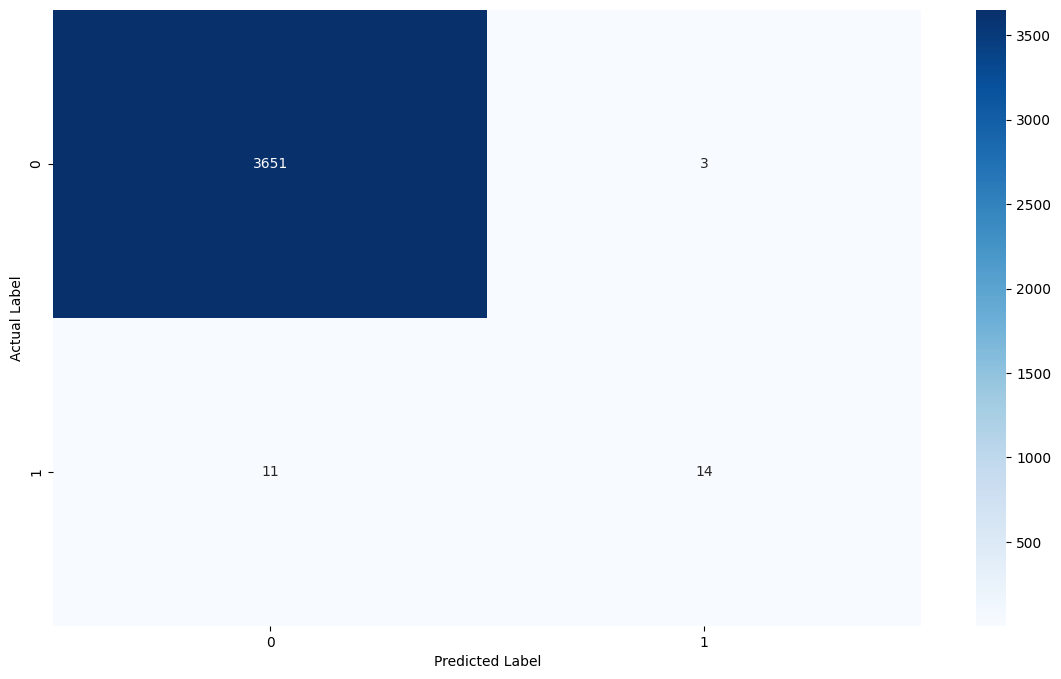

In [ ]:
rf_smote = RandomForestClassifier()
rf_smote.fit(x_train_s, y_train_s)
y_pred_smote = rf_smote.predict(original_Xtest)
conf_matrix_smote = confusion_matrix(original_ytest, y_pred_smote)

sns.heatmap(conf_matrix_smote, annot=True, cmap="Blues", fmt='d', cbar = True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
print(classification_report(original_ytest, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3654
           1       0.82      0.56      0.67        25

    accuracy                           1.00      3679
   macro avg       0.91      0.78      0.83      3679
weighted avg       1.00      1.00      1.00      3679



Text(0.5, 1.0, 'Precision Recall Curve')

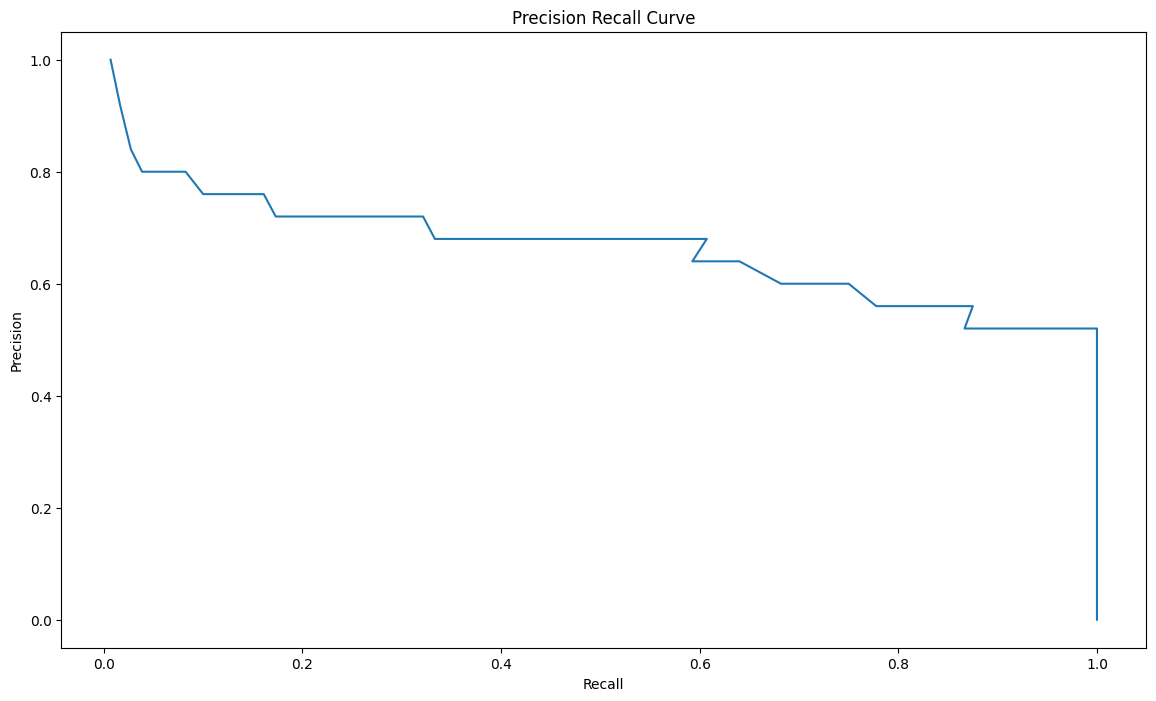

In [ ]:
y_pred_prob_smote = rf_smote.predict_proba(original_Xtest)[:,1]
precision, recall, thresholds = precision_recall_curve(original_ytest, y_pred_prob_smote)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

Initial '1' labels count in y_train:  99
Initial '0' labels count in y_train:  14620
Shape of train_x after UnderSampling:  (198, 59)
Shape of train_y after UnderSampling:  (198,)
Percentage of '1' labels after UnderSampling: 50.00%
Percentage of '0' labels after UnderSampling: 50.00%


<ipython-input-119-097e3af275d3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_us, palette='Set2')


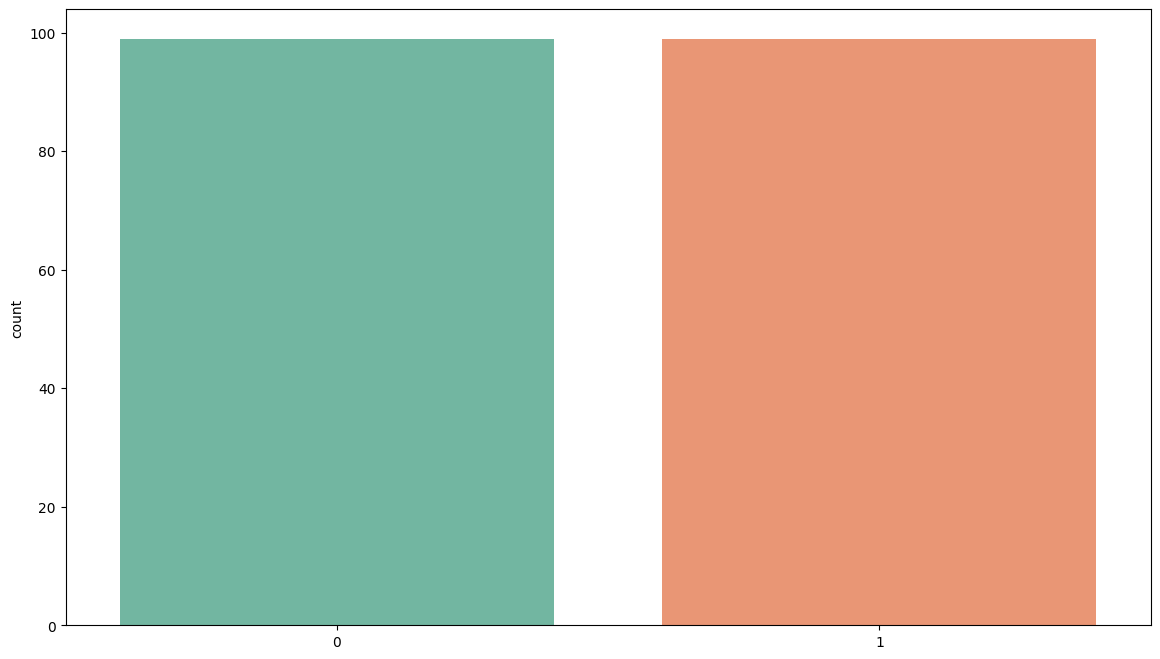

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Before UnderSampling
print("Initial '1' labels count in y_train: ", sum(original_ytrain==1))
print("Initial '0' labels count in y_train: ", sum(original_ytrain==0))

# Applying RandomUnderSampler
rus = RandomUnderSampler(random_state=2)
x_train_us, y_train_us = rus.fit_resample(original_Xtrain, original_ytrain.ravel())


# After UnderSampling
print("Shape of train_x after UnderSampling: ", x_train_us.shape)
print("Shape of train_y after UnderSampling: ", y_train_us.shape)

print("Percentage of '1' labels after UnderSampling: {:.2f}%".format(sum(y_train_us==1)/len(y_train_us)*100))
print("Percentage of '0' labels after UnderSampling: {:.2f}%".format(sum(y_train_us==0)/len(y_train_us)*100))


# Visualizing the distribution with a different palette
sns.countplot(x=y_train_us, palette='Set2')
plt.show()

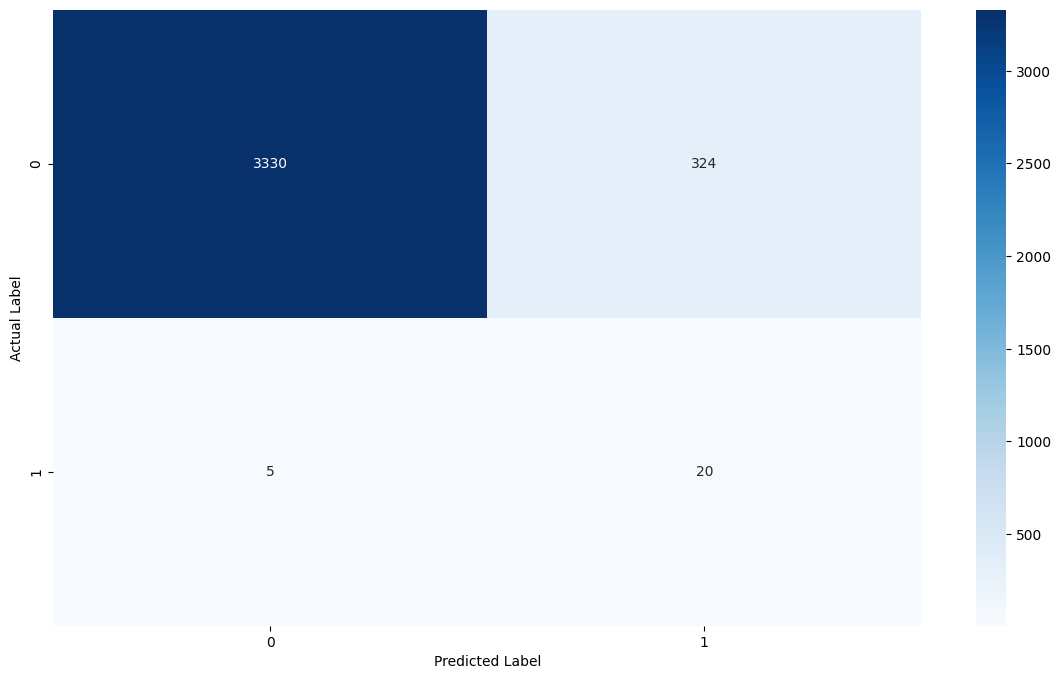

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3654
           1       0.06      0.80      0.11        25

    accuracy                           0.91      3679
   macro avg       0.53      0.86      0.53      3679
weighted avg       0.99      0.91      0.95      3679



In [ ]:
# Training Logistic Regression on the undersampled data
rf_under = RandomForestClassifier()
rf_under.fit(x_train_us, y_train_us)

# Predicting on the test set
y_pred_under = rf_under.predict(original_Xtest)

# Creating confusion matrix and classification report
conf_matrix_under = confusion_matrix(original_ytest, y_pred_under)

# Plotting the confusion matrix
sns.heatmap(conf_matrix_under, annot=True, cmap="Blues", fmt='d', cbar=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Printing the classification report
print(classification_report(original_ytest, y_pred_under))